# N HITS

This notebook was executed in Google Colab using A100-GPU.

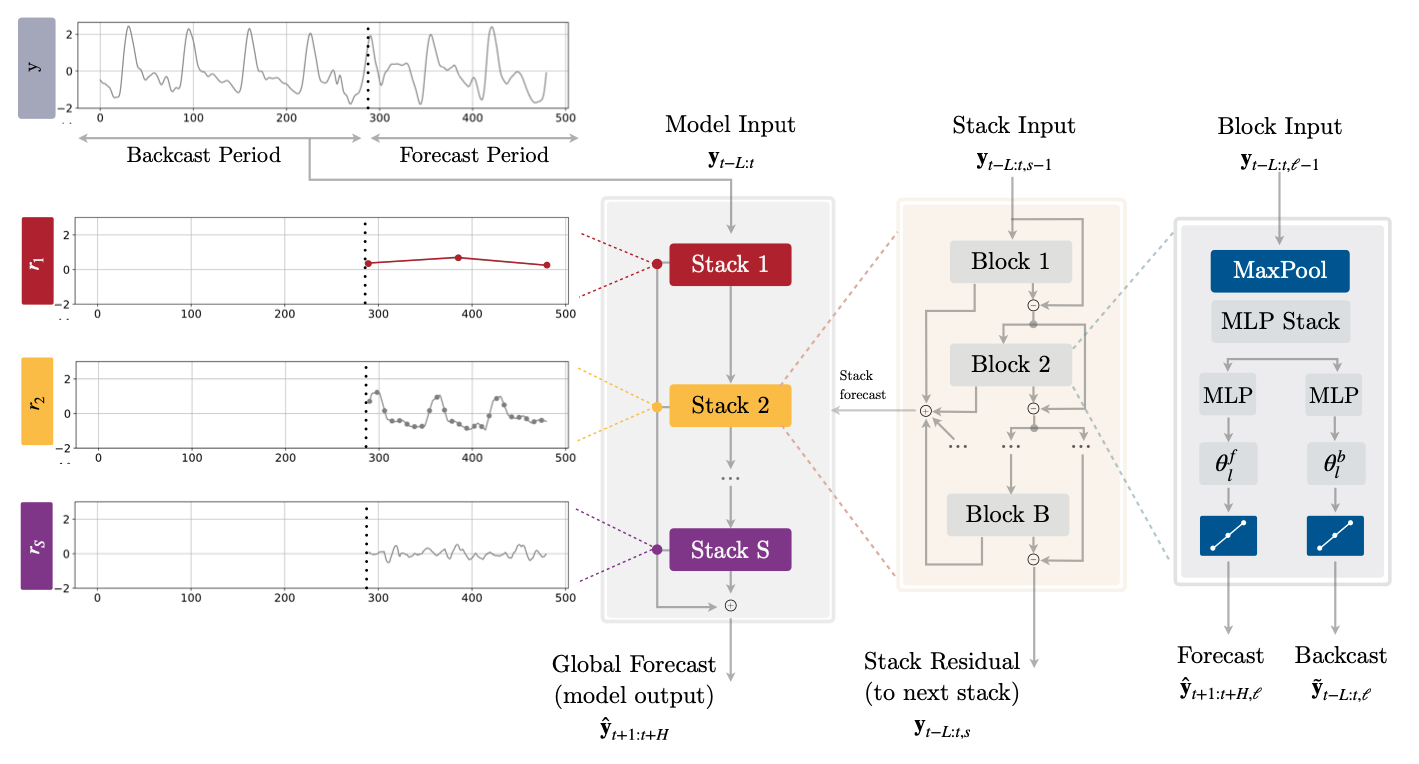

### Start of execution

In [1]:
import time

In [2]:
start = time.time()

### 1. Setting the environment

In [3]:
!pip install -q neuralforecast

### 2. Import Libraries

In [4]:
import pandas as pd
from ray import tune
import matplotlib.pyplot as plt
from neuralforecast.auto import AutoMLP
from neuralforecast.core import NeuralForecast
from neuralforecast.models import NBEATS, NHITS
from neuralforecast.utils import AirPassengersDF

### 3. Load Datasets

In [5]:
Y_df = AirPassengersDF
Y_df = Y_df.reset_index(drop=True)
Y_df.head()

,unique_id,ds,y
0,1.0,1949-01-31,112.0
1,1.0,1949-02-28,118.0
2,1.0,1949-03-31,132.0
3,1.0,1949-04-30,129.0
4,1.0,1949-05-31,121.0


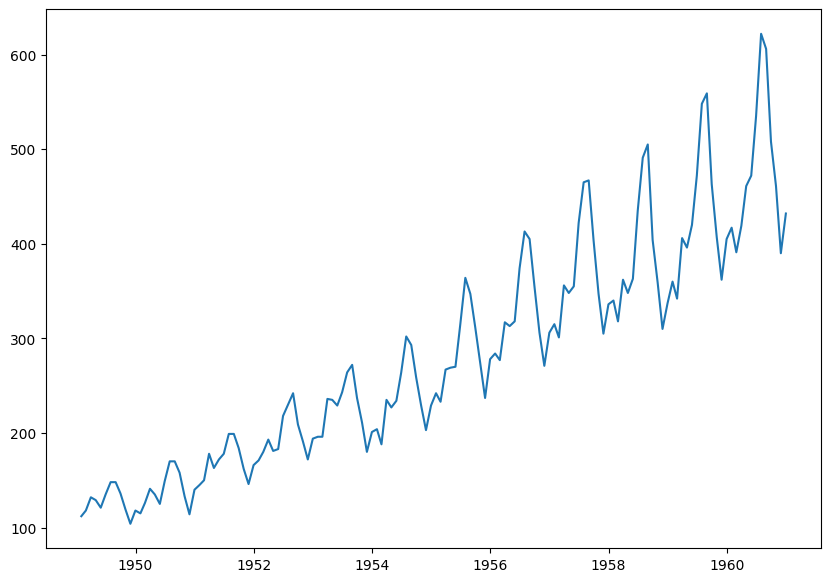

In [6]:
plt.figure(figsize = (10, 7))
plt.plot(Y_df['ds'], Y_df['y'])
plt.show()

### 4. Models

In [7]:
horizon = 12

models = [NHITS(input_size=2 * horizon, h=horizon, max_steps=50)]

INFO:lightning_fabric.utilities.seed:Seed set to 1


### 5. Train

In [8]:
nf = NeuralForecast(models = models, freq = 'M')

In [9]:
nf.fit(df = Y_df)

/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:345: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:You are using a CUDA device ('NVIDIA L4') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Par

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=50` reached.


### 6. Predict

In [10]:
Y_hat_df = nf.predict().reset_index()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:209: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [11]:
plot_df = pd.concat([Y_df, Y_hat_df]).set_index('ds')

<Figure size 1200x300 with 0 Axes>

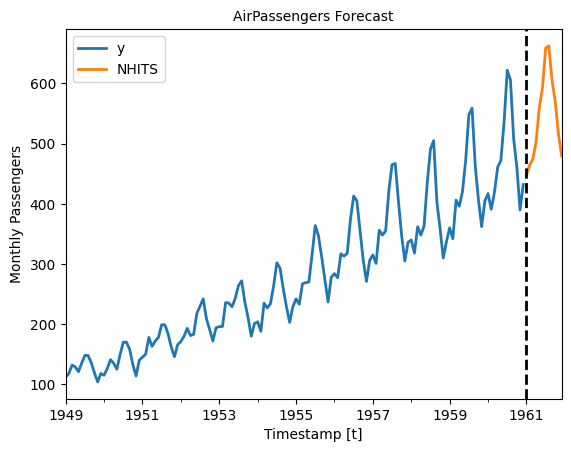

In [12]:
plt.figure(figsize = (12, 3))
plot_df[['y', 'NHITS']].plot(linewidth=2)

plt.title('AirPassengers Forecast', fontsize=10)
plt.ylabel('Monthly Passengers', fontsize=10)
plt.xlabel('Timestamp [t]', fontsize=10)
plt.axvline(x = plot_df.index[-horizon], color='k', linestyle='--', linewidth=2)
plt.legend(prop={'size': 10})

### End of execution

In [13]:
end = time.time()

delta = (end - start)

hours = int(delta/3_600)
mins = int((delta - hours*3_600)/60)
secs = int(delta - hours*3_600 - mins*60)

print(f'Hours: {hours}, Minutes: {mins}, Seconds: {secs}')

Hours: 0, Minutes: 0, Seconds: 12
